# Prédiction du prix d'un logement: Probleme de regression

In [1]:
import pandas as pd
df1 = pd.read_csv("Housing.csv")
df1.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## Exploration des données

In [2]:
print("dimension du dataframe", df1.shape , "\n")
print(df1.info())

dimension du dataframe (545, 13) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None


In [3]:
df1.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


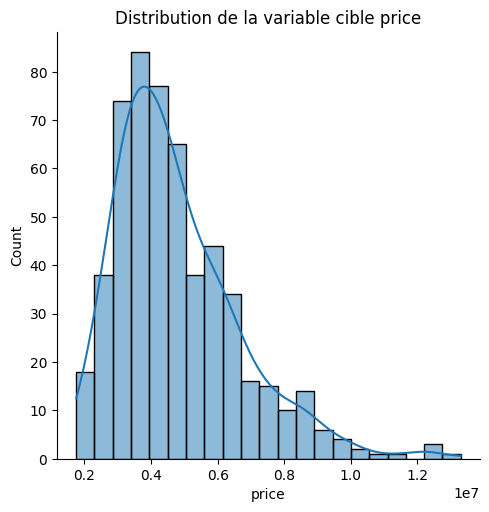

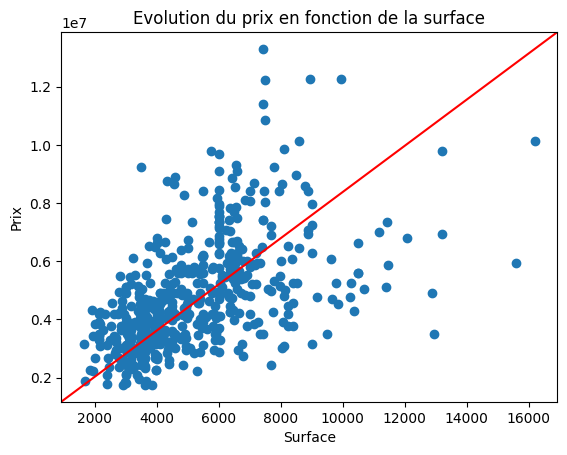

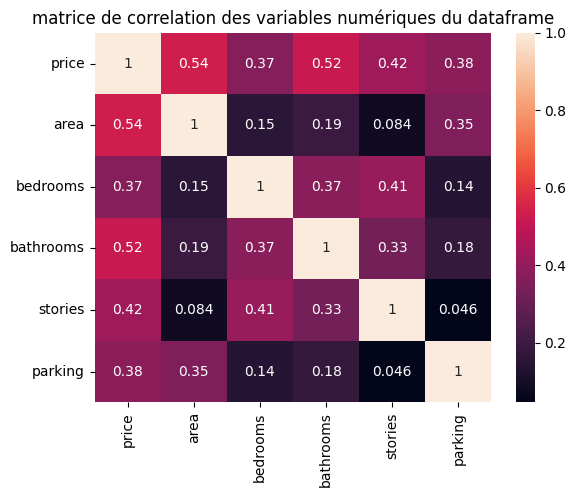

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
import numpy as np
%matplotlib inline

sns.displot(df1['price'], kde=True)
plt.title("Distribution de la variable cible price")
plt.show()

fig, ax = plt.subplots()
ax.scatter(df1['area'], df1['price'])
line = mlines.Line2D([0, 1], [0, 1], color="red")
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
plt.xlabel("Surface")
plt.ylabel("Prix")
plt.title("Evolution du prix en fonction de la surface")
plt.show()

# Exclure les colonnes non numériques
numeric_columns = df1.select_dtypes(include=[np.number])
sns.heatmap(numeric_columns.corr(), annot=True)
plt.title("matrice de correlation des variables numériques du dataframe")
plt.show()

# sns.heatmap(df1.corr(), annot=True)
# plt.title("matrice de correlation des variables du dataframe")
# plt.show()

# sns.heatmap(df1.corr(), annot=True)



In [7]:
from scipy.stats import pearsonr
pd.DataFrame(pearsonr(df1['price'], df1['area']), index=['pearson', 'p-value'], columns=['Test de Pearson'])

,Test de Pearson
pearson,5.359973e-01
p-value,7.388225e-42


### cleaning des données et preprocessing

In [8]:
print('Nombre des valeurs manquantes par variable : \n', df1.isna().sum())
print('\n')
print('Nombre de doublons : \n', df1.duplicated().sum())

Nombre des valeurs manquantes par variable : 
 price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


Nombre de doublons : 
 0


In [ ]:
df1['mainroad'] = df1['mainroad'].replace(['no', 'yes'], [0, 1])
df1['guestroom'] = df1['guestroom'].replace(['no', 'yes'], [0, 1])
df1['basement'] = df1['basement'].replace(['no', 'yes'], [0, 1])
df1['hotwaterheating'] = df1['hotwaterheating'].replace(['no', 'yes'], [0, 1])
df1['airconditioning'] = df1['airconditioning'].replace(['no', 'yes'], [0, 1])
df1['prefarea'] = df1['prefarea'].replace(['no', 'yes'], [0, 1])
df1['furnishingstatus'] = df1['furnishingstatus'].replace(['furnished', 'semi-furnished', 'unfurnished'], [2, 1, 0])

In [10]:
df1.to_csv('df_preprocessed.csv', index=False)

In [11]:
pd.read_csv('df_preprocessed.csv')

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,2


In [12]:
y = df1['price'] # variable cible à prédire (apprentissage supervisé)
X = df1.drop('price', axis=1) # variables explicatives permettant de faire des la prédiction

In [13]:
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,2
1,8960,4,4,4,1,0,0,0,1,3,0,2
2,9960,3,2,2,1,0,1,0,0,2,1,1
3,7500,4,2,2,1,0,1,0,1,3,1,2
4,7420,4,1,2,1,1,1,0,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,0,0
541,2400,3,1,1,0,0,0,0,0,0,0,1
542,3620,2,1,1,1,0,0,0,0,0,0,0
543,2910,3,1,1,0,0,0,0,0,0,0,2


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
X_train[num] = scaler.fit_transform(X_train[num])
X_test[num] = scaler.transform(X_test[num])

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [17]:
import joblib

joblib.dump(reg, 'model_reg_line')

['model_reg_line']

In [18]:
y_pred = reg.predict(X_test)
print('Score: ', r2_score(y_test, y_pred)) # entre 0 et 1


Score:  0.6494754192267795


In [19]:
from sklearn.ensemble import RandomForestRegressor

reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [20]:
joblib.dump(reg_rf, 'model_reg_rf')

['model_reg_rf']

In [21]:
y_pred_rf = reg_rf.predict(X_test)
print('Score: ', r2_score(y_test, y_pred_rf)) # entre 0 et 1

Score:  0.6280170731674446


In [22]:
from sklearn.neighbors import KNeighborsRegressor

reg_knn = KNeighborsRegressor()
reg_knn.fit(X_train, y_train)

KNeighborsRegressor()

In [23]:
joblib.dump(reg_knn, 'model_reg_knn')

['model_reg_knn']

In [24]:
y_pred_knn = reg_knn.predict(X_test)
print('Score: ', r2_score(y_test, y_pred_knn)) # entre 0 et 1

Score:  0.5717227120663362
